# Facial Emotion EDA

See [`README.md`](https://github.com/AdamSpannbauer/emotion_tracker/blob/master/README.md) for more info on data/data collection.

In [1]:
import glob
import datetime
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read and combine all relevant csvs
csv_paths = glob.glob('data/*.csv')
emote_df = pd.concat(pd.read_csv(p) for p in csv_paths)

# Convert timestamp from UTC to EST and set as index
emote_df['timestamp'] = pd.to_datetime(emote_df['timestamp']).dt.tz_localize('UTC')
emote_df['timestamp'] = emote_df['timestamp'].dt.tz_convert('US/Eastern')

emote_df = emote_df.set_index('timestamp')
print(f'Data contains {emote_df.shape[0]} observations.')
emote_df.head()

Data contains 23361 observations.


,angry,scared,happy,sad,surprised,neutral
timestamp,,,,,,
2019-11-18 08:51:33-05:00,0.194844,0.178171,0.073702,0.447554,0.018163,0.087565
2019-11-18 08:51:48-05:00,0.230602,0.170274,0.000957,0.370244,0.008239,0.219685
2019-11-18 08:52:03-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-18 08:52:18-05:00,0.058993,0.110013,0.001582,0.541622,0.007429,0.280362
2019-11-18 08:52:33-05:00,0.081174,0.123281,0.001652,0.406463,0.004023,0.383407


## When was data collected?

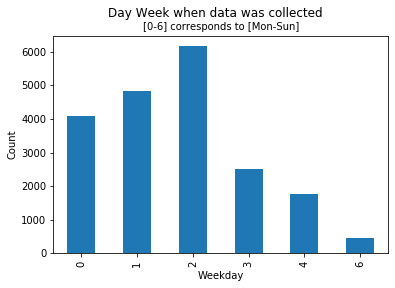

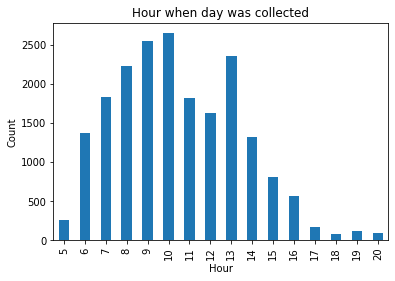

In [2]:
emote_df.groupby(emote_df.index.dayofweek).count().plot(y=0, kind='bar', legend=False)
plt.suptitle('Day Week when data was collected')
plt.title('[0-6] corresponds to [Mon-Sun]', size=10)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

emote_df.groupby(emote_df.index.hour).count().plot(y=0, kind='bar', legend=False)
plt.title('Hour when day was collected')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

## Patterns for facial expression by day/hour?

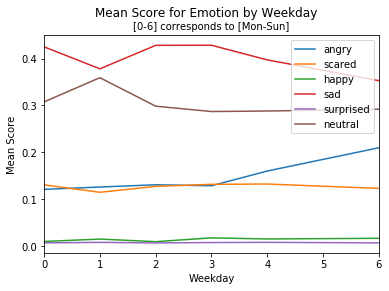

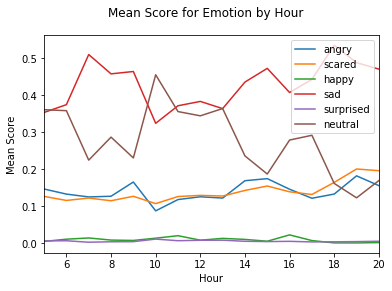

In [3]:
emote_df.groupby(emote_df.index.dayofweek).mean().plot()
plt.suptitle('Mean Score for Emotion by Weekday')
plt.title('[0-6] corresponds to [Mon-Sun]', size=10)
plt.xlabel('Weekday')
plt.ylabel('Mean Score')
plt.show()

emote_df.groupby(emote_df.index.hour).mean().plot()
plt.suptitle('Mean Score for Emotion by Hour')
plt.xlabel('Hour')
plt.ylabel('Mean Score')
plt.show()

## Distribution of emotions?

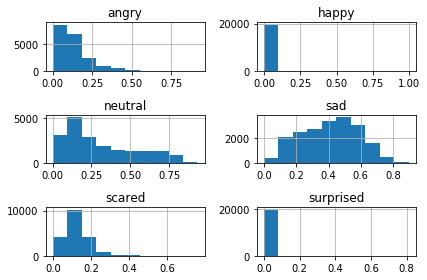

In [4]:
emote_df.hist()
plt.tight_layout()
plt.show()